In [1]:
import tempfile
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

from common import observations, GEOtopRun

/home/max/.local/share/virtualenvs/MHPC-project-WaUKRq_w/lib/python3.8/site-packages/geotopy/__init__.py:35: RuntimeWarning: Default GEOTop executable not found, check your installation
  warnings.warn("Default GEOTop executable not found, check your installation",


In [2]:
targets = [
    ('rainfall_amount', 'mm', 'Rainfall Amount'),
    ('wind_speed', 'm/s', 'Wind Speed'),
    ('relative_humidity', None, 'Relative Humidity'),
     ('air_temperature', 'C', 'Air Temperature'),
    ('surface_downwelling_shortwave_flux', 'W/m2', 'Downwelling Shortwave Flux'),
    ('soil_moisture_content_50', None, 'Soil Moisture at 50mm'),
    ('soil_moisture_content_200', None, 'Soil Moisture at 200mm'),
    ('latent_heat_flux_in_air', 'W/m2', 'Latent Heat Flux'),
    ('sensible_heat_flux_in_air', 'W/m2', 'Sensible Heat Flux')
]

In [3]:
%%time

model = GEOtopRun('inputs/Matsch_B2/run',
                         exe='../geotop/build/geotop',
                         run_args={'check': True, 
                                   'capture_output': True})

with tempfile.TemporaryDirectory() as tmpdir:
    sim = model.eval(tmpdir)

obs = observations('inputs/Matsch_B2/obs.csv')

CPU times: user 2.51 s, sys: 72.3 ms, total: 2.59 s
Wall time: 23.1 s


# Rainfall Amount

Loss for rainfall_amount is 1.2081292275821869


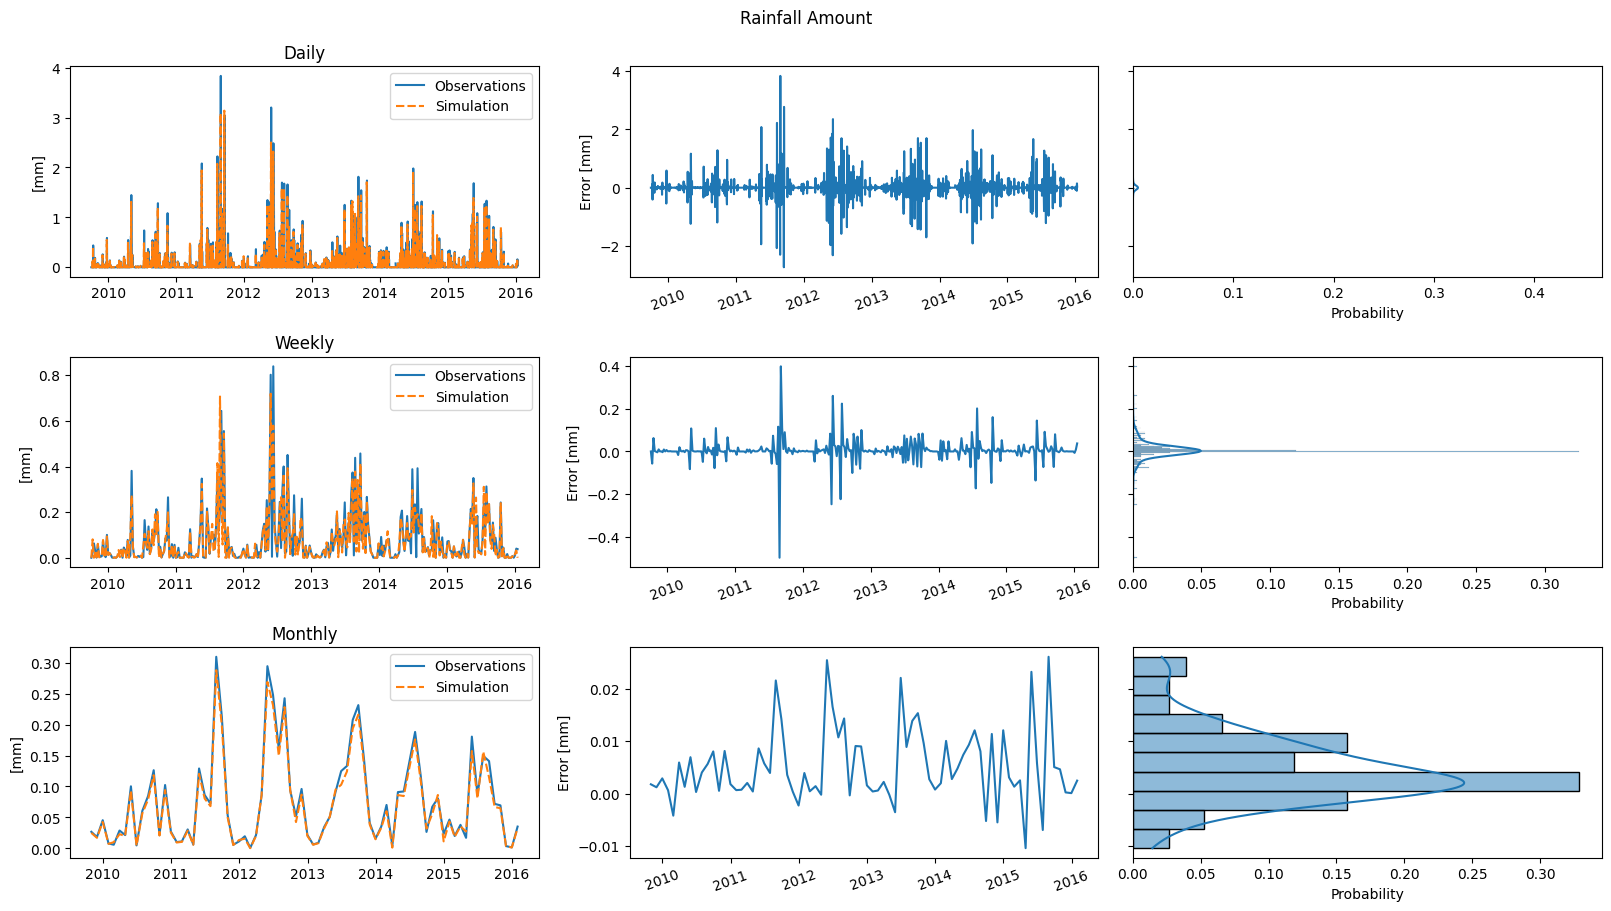

# Wind Speed

Loss for wind_speed is 0.48310356532361937


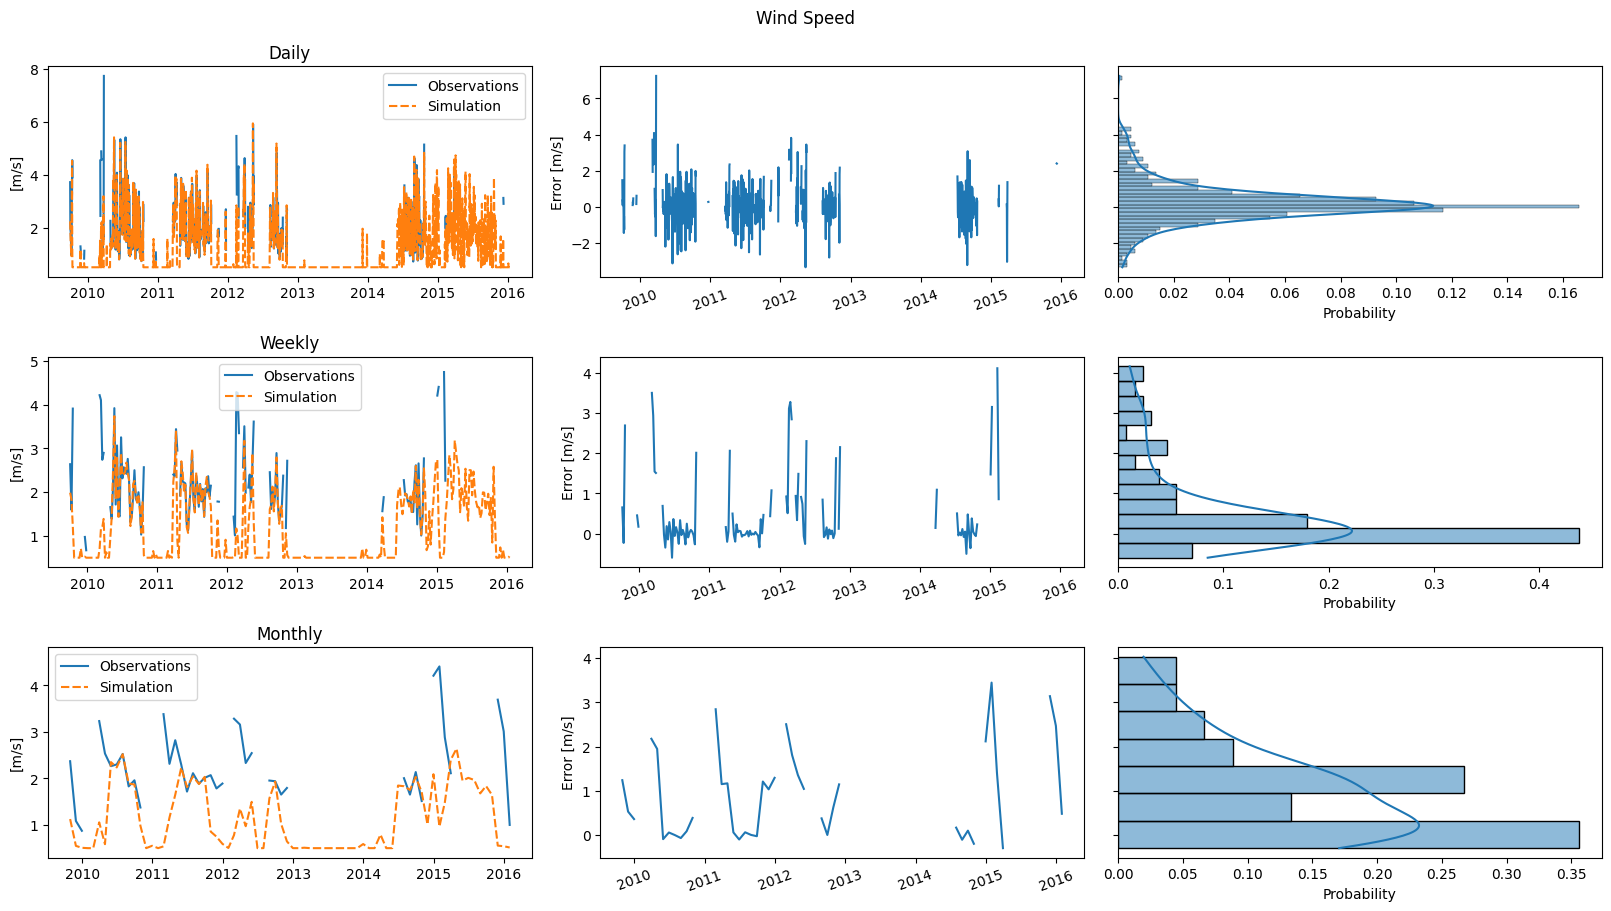

# Relative Humidity

Loss for relative_humidity is 0.22334541041402375


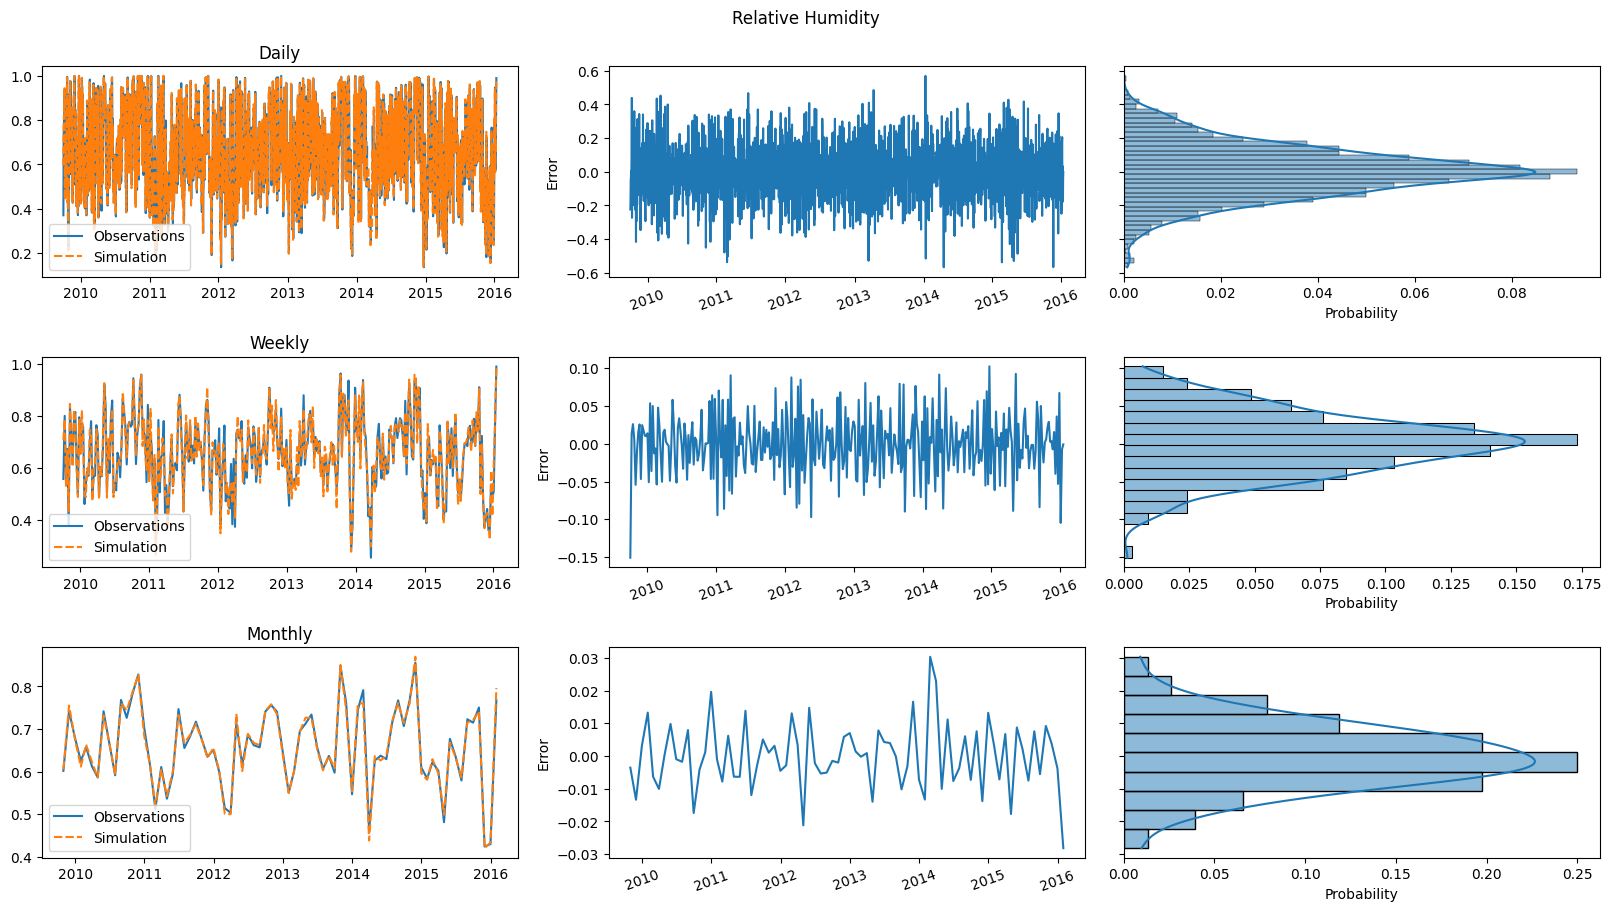

# Air Temperature

Loss for air_temperature is 0.23219557999021476


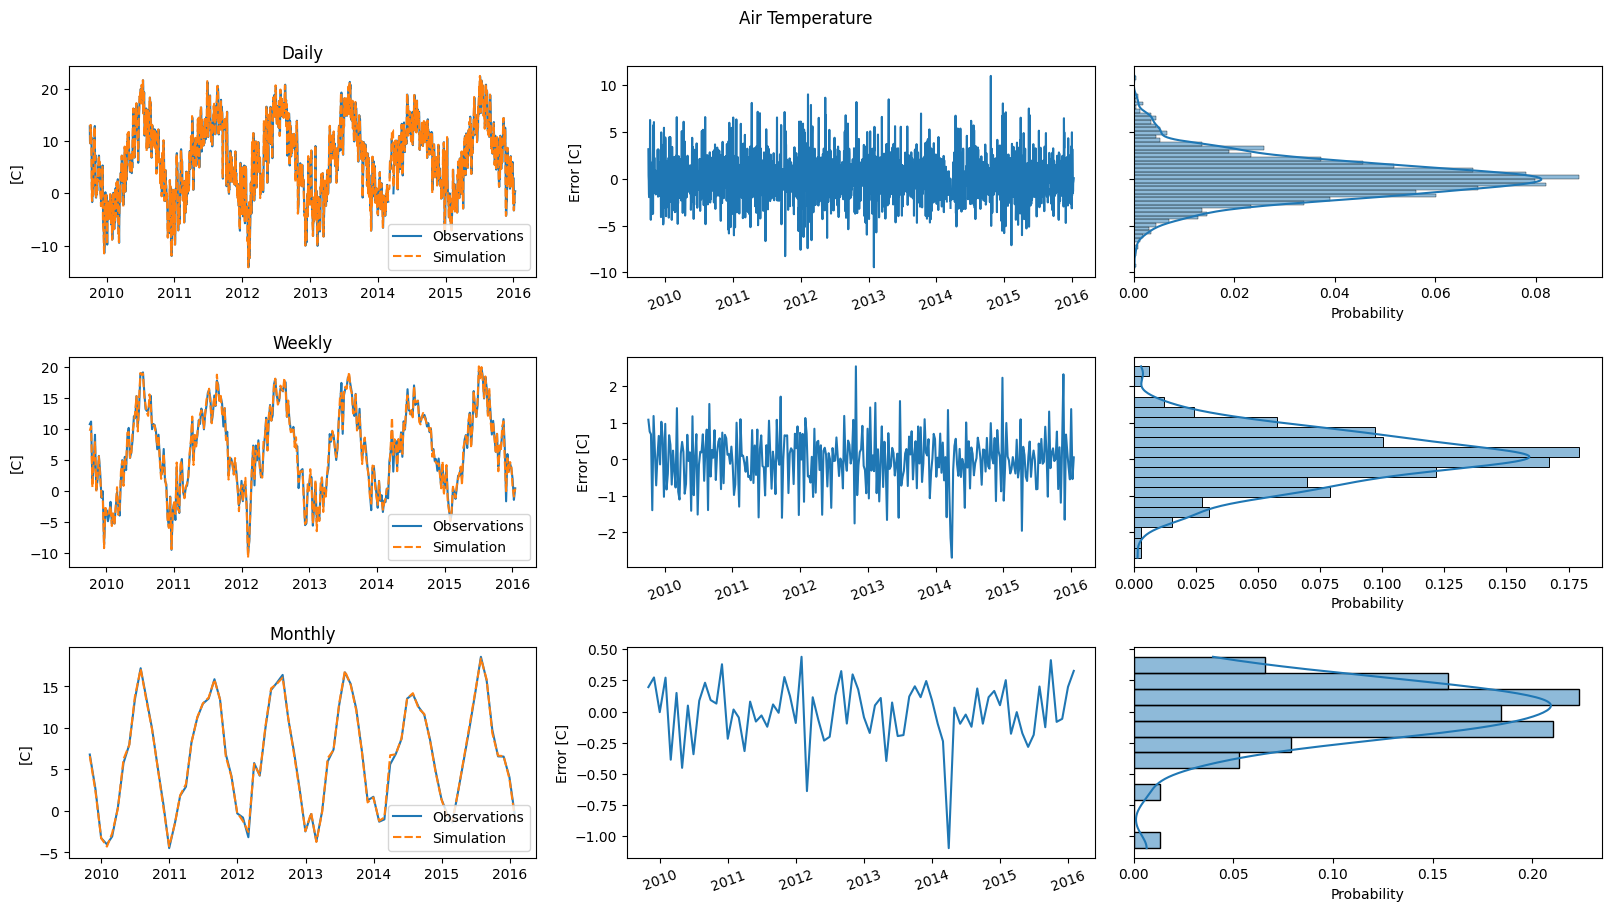

# Downwelling Shortwave Flux

Loss for surface_downwelling_shortwave_flux is 0.5064911972354286


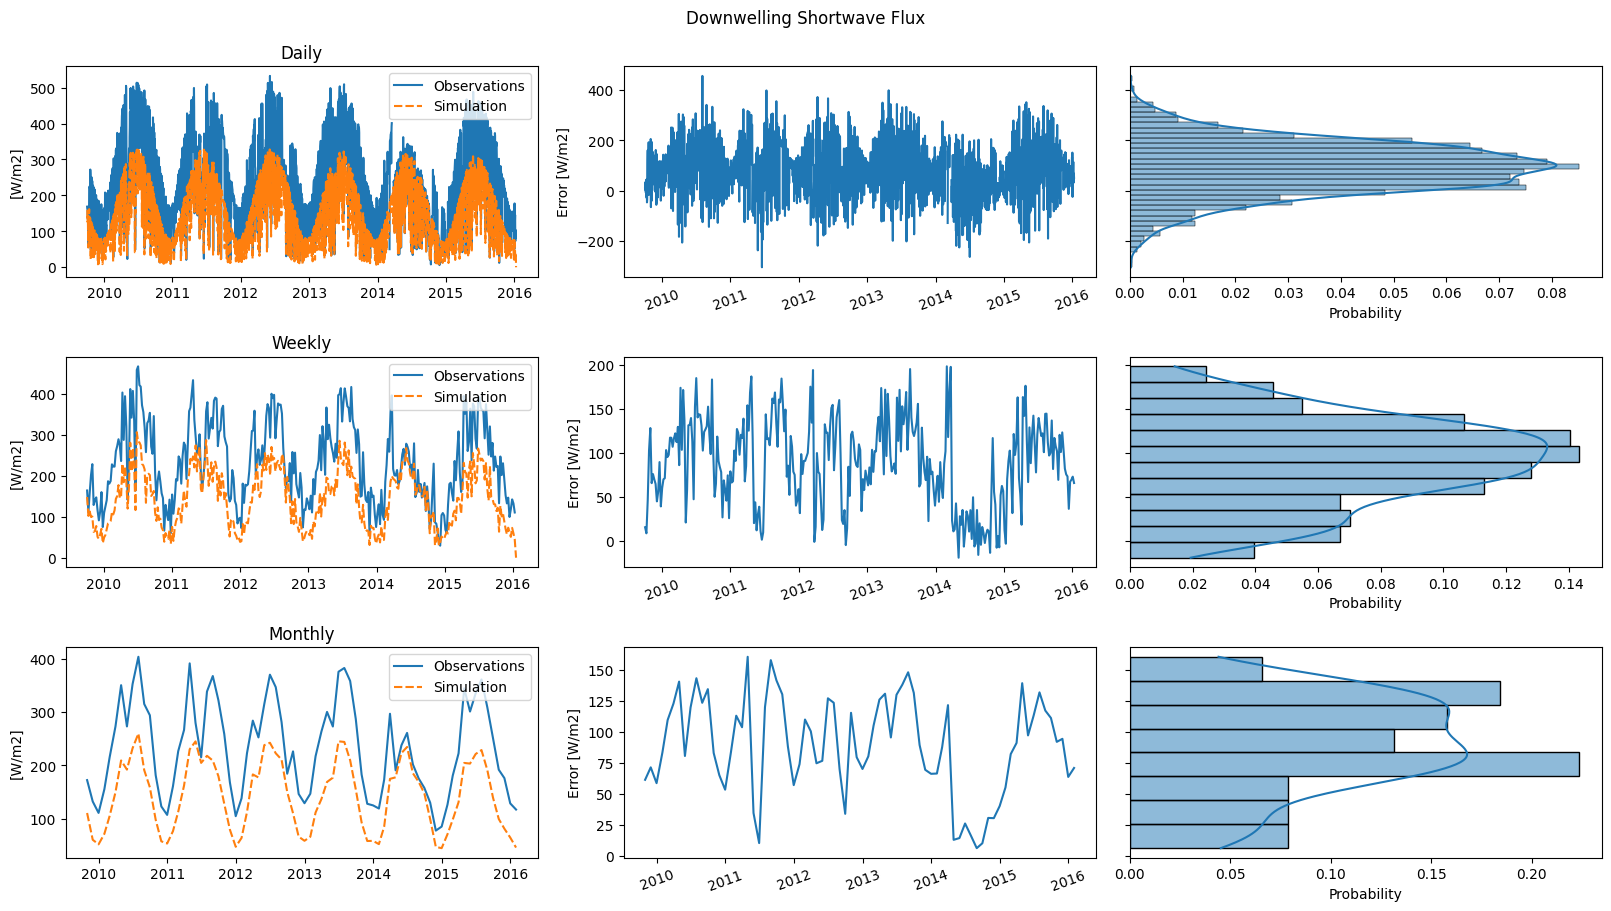

# Soil Moisture at 50mm

Loss for soil_moisture_content_50 is 0.2487942933362071


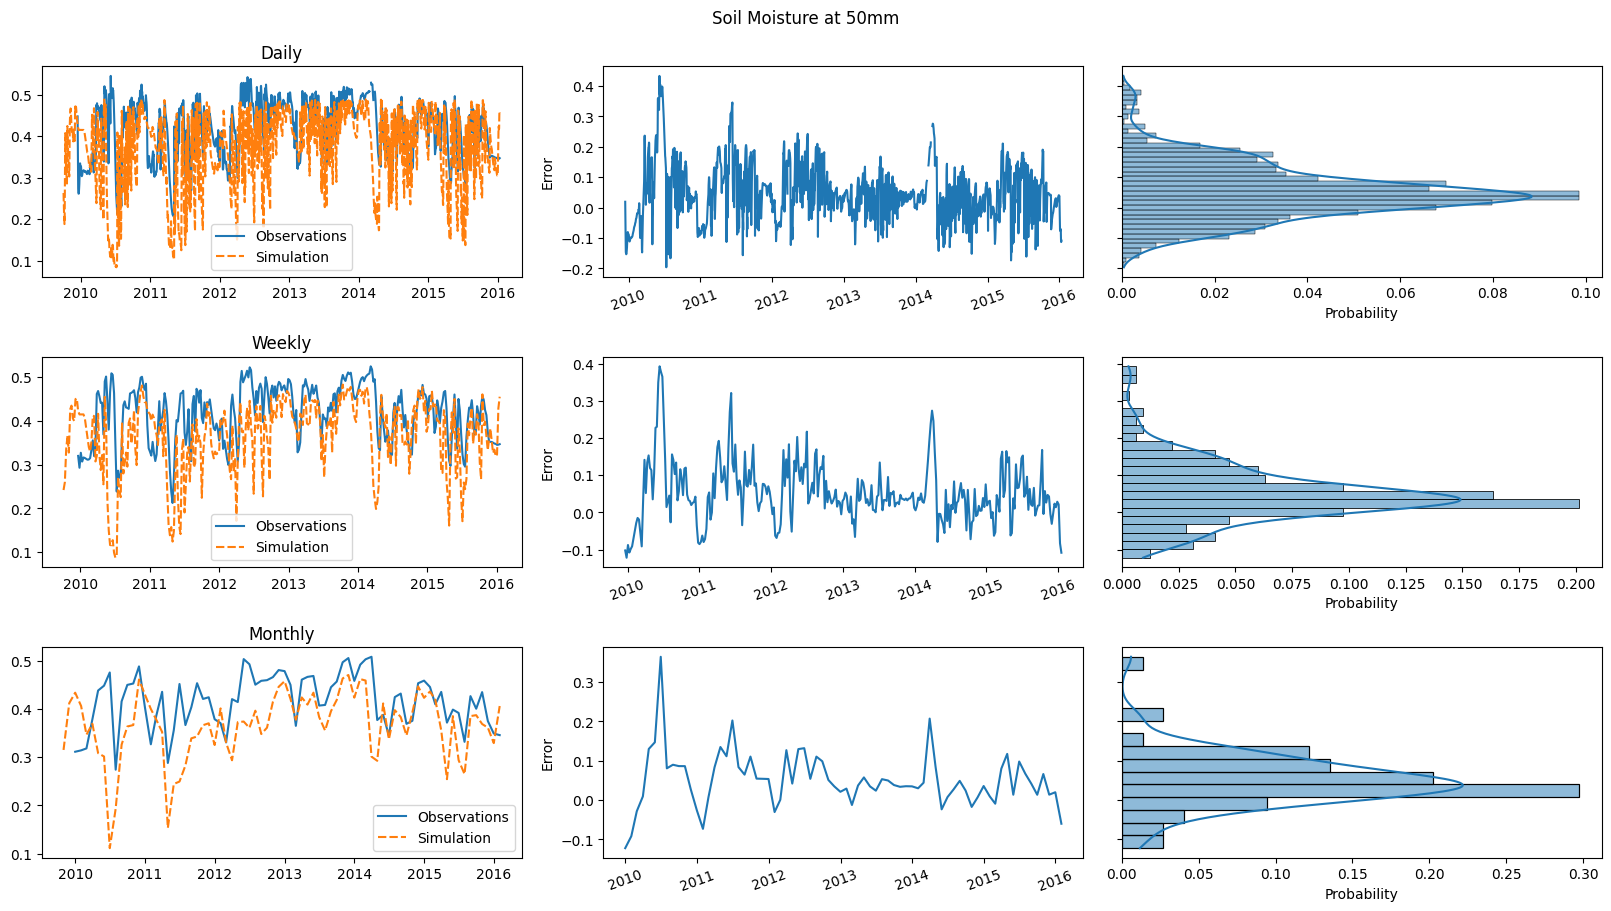

# Soil Moisture at 200mm

Loss for soil_moisture_content_200 is 0.2671673030163124


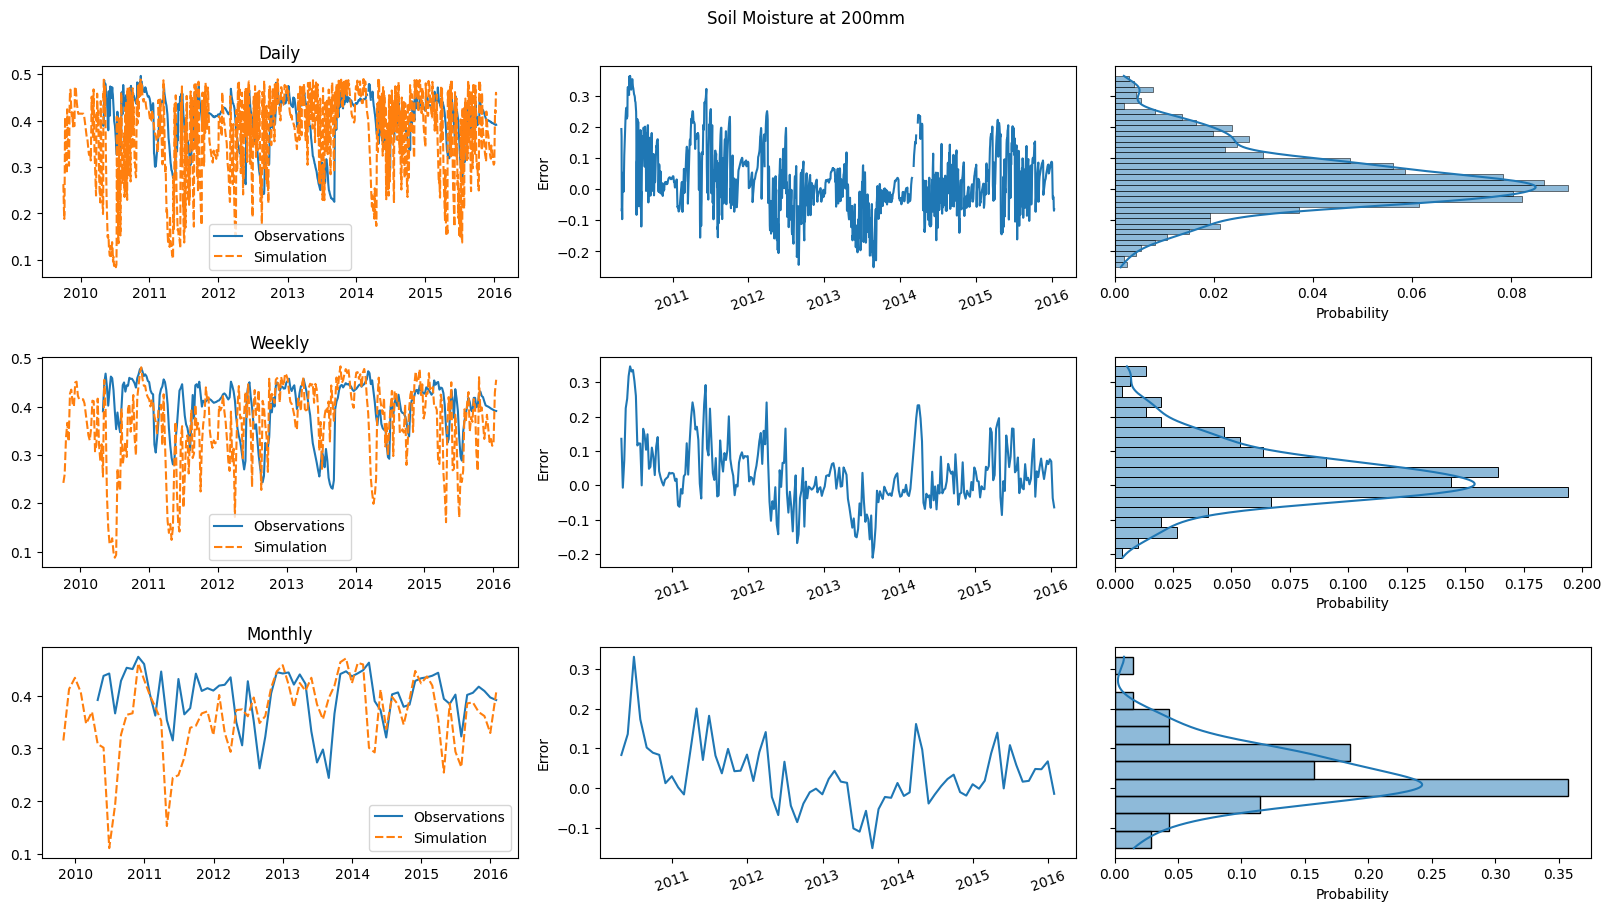

# Latent Heat Flux

Loss for latent_heat_flux_in_air is 0.7254196376962523


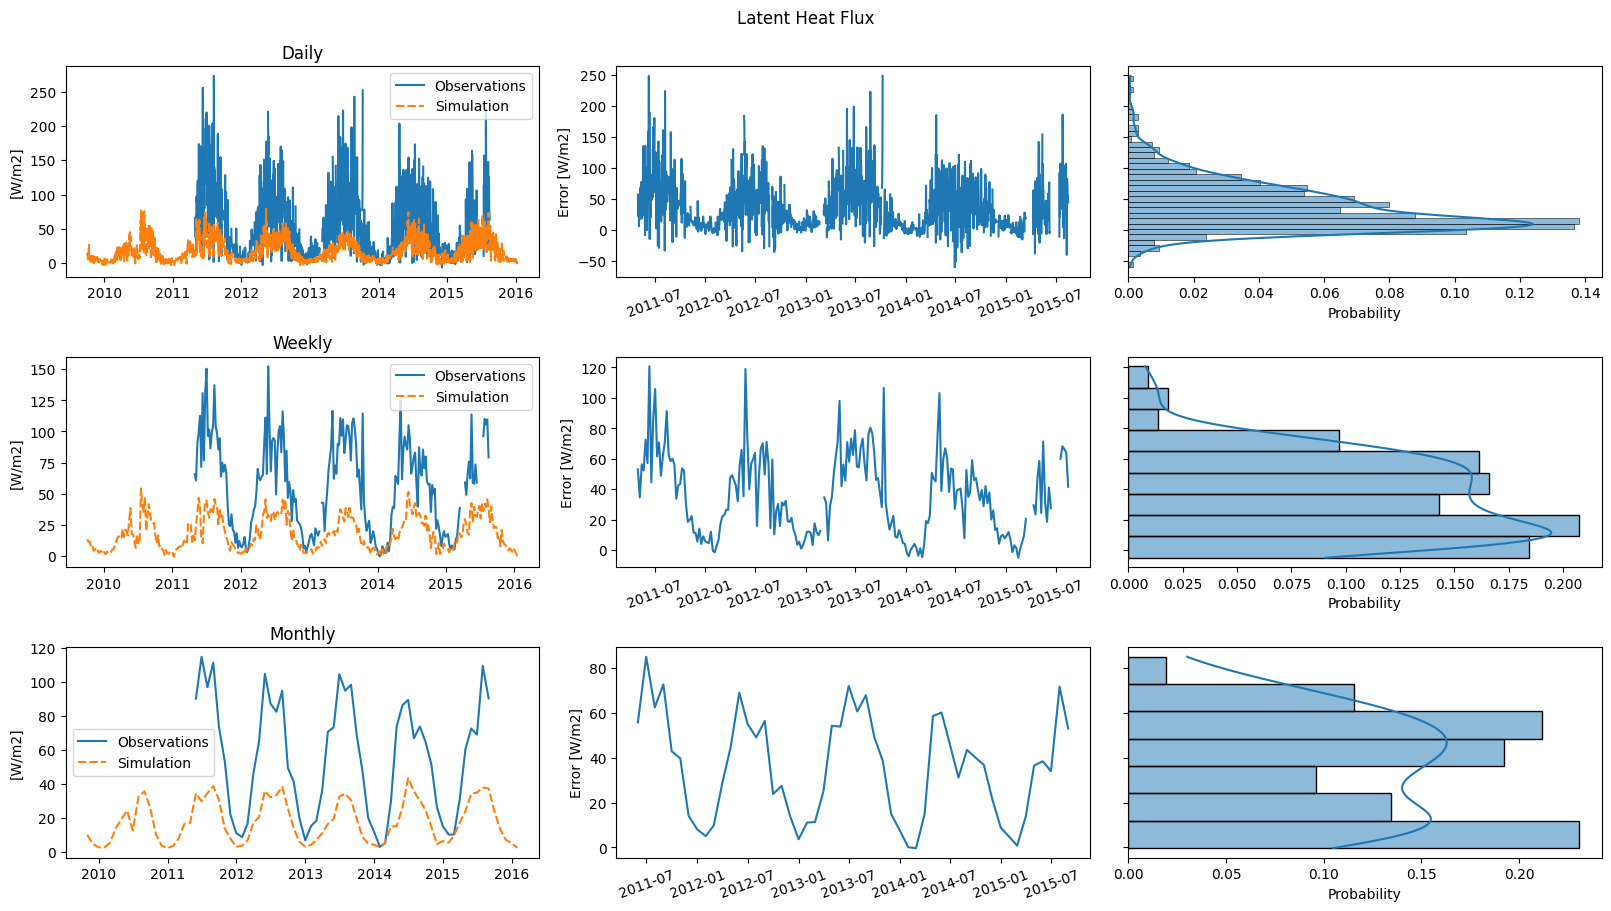

# Sensible Heat Flux

Loss for sensible_heat_flux_in_air is 0.8204535257313121


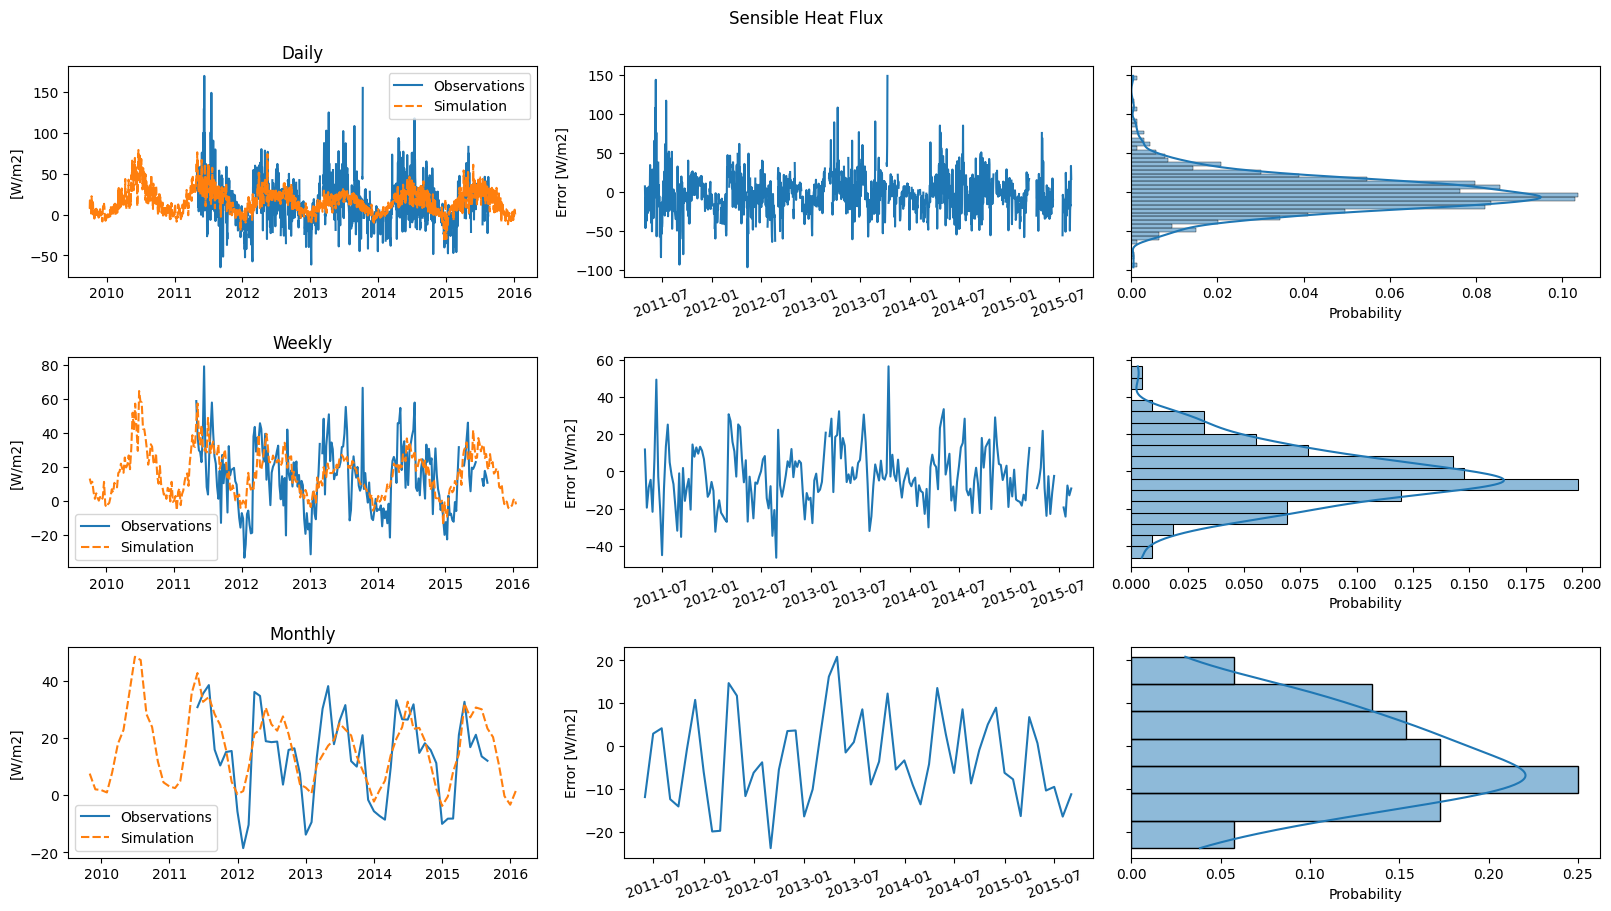

In [4]:
for name, unit, desc in targets:
    display(Markdown(f"# {desc}"))
    print(f"Loss for {name} is {obs.metric(name, sim)}")
    obs.compare(name, sim, desc=desc, unit=unit)
    plt.show()